In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from pathlib import Path
from parse import parse

from alphaMusic.utils.fls_utils import load_from_pkl
import alphaMusic.evaluation as evl

In [3]:
sns.set()
sns.set_context("paper")
cste = 18
params = {
    'backend': 'ps',
    'axes.labelsize': cste,
    'axes.titlesize': cste,
    'font.size': cste,
    'legend.fontsize': cste,
    'xtick.labelsize': cste,
    'ytick.labelsize': cste,
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': 'ptmrr8re',
}

sns.set_style("whitegrid", {
    'pgf.texsystem': 'xelatex',  # pdflatex, xelatex, lualatex
    'text.usetex': True,
    'font.family': 'serif',
    'axes.labelsize': cste,
    'axes.titlesize': cste,
    'font.size': cste,
    'legend.fontsize': cste,
    'xtick.labelsize': cste,
    'ytick.labelsize': cste,
    ''
    'font.serif': [],
    'lines.linewidth':1.5,
})
plt.rcParams.update(params)

pal = sns.cubehelix_palette(7, start=0.5, rot=-0.5,dark=0.3, light=.75, reverse=True, hue=1.)

fig_width_pt = 700.6937  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27               # Convert pt to inch
golden_mean = (np.sqrt(5) - 1.0) / 2.0         # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width * golden_mean      # height in inches
fig_size = np.array([fig_width, fig_height])

In [4]:
path_to_results = Path('..','recipes','EUSIPCO22','results')
assert path_to_results.exists()

N=30
RT60=0.5
DRR=1
SNR=10

files = path_to_results.glob(f'N:{N}*RT60:{RT60}*SNR:{SNR}*DRR:{DRR}*.pkl')
exp_name = 'N:{n_samples}_RT60:{rt60_name}_SNR:{snr_name}_DRR:{drr_name}_nsrcs:{n_srcs}_nmics:{n_mics}_noise:{noise_type}'

results = pd.DataFrame()
for file in files:
    print(file)
    params = parse(exp_name,str(file.name))
    df = load_from_pkl(file)
    df['n_mics'] = int(params['n_mics'])
    df['n_srcs'] = int(params['n_srcs'])
    results = pd.concat([results, df], ignore_index=True)

../recipes/EUSIPCO22/results/N:30_RT60:0.5_SNR:10_DRR:1_nsrcs:2_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:0.5_SNR:10_DRR:1_nsrcs:1_nmics:2_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:0.5_SNR:10_DRR:1_nsrcs:2_nmics:2_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:0.5_SNR:10_DRR:1_nsrcs:3_nmics:6_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:0.5_SNR:10_DRR:1_nsrcs:4_nmics:6_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:0.5_SNR:10_DRR:1_nsrcs:1_nmics:6_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:0.5_SNR:10_DRR:1_nsrcs:4_nmics:2_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:0.5_SNR:10_DRR:1_nsrcs:3_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:0.5_SNR:10_DRR:1_nsrcs:3_nmics:2_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:0.5_SNR:10_DRR:1_nsrcs:2_nmics:6_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:0

In [31]:
df = pd.DataFrame()

for r, row in results.iterrows():
    
    # compute metrics
    doas_est = row['DOAs_est']
    doas_ref = row['DOAs']
    
    metrics = evl.compute_ssl_metrics(doas_est, doas_ref)
    
    df.at[r,'algo'] = row['algo']

    df.at[r,'MAE'] = metrics['MAE']
    df.at[r,'RMSE'] = metrics['RMSE']
    df.at[r,'ACC5'] = metrics['ACC5']
    df.at[r,'ACC10'] = metrics['ACC10']
    df.at[r,'MISS'] = metrics['MISS']
    df.at[r,'time'] = row['time']
    
    # params
    df.at[r,'SNR'] = row['SNR']
    df.at[r,'RT60'] = row['RT60']
    df.at[r,'DRR'] = row['DRR']
    df.at[r,'n_mics'] = int(row['n_mics'])
    df.at[r,'n_srcs'] = int(row['n_srcs'])
    df.at[r, 'p'] = row['p']
    df.at[r, 'alpha'] = row['alpha']
    
    if row['algo'] in ['aMUSIC', 'aNormMUSIC']:
        if row['alpha'] == 1.8:
            a = r'$\alpha=1.8$'
        elif row['alpha'] == 1.5:
            a = r'$\alpha=1.5$'
        else:
            a = r'$\alpha_{\mathrm{est}}$'
        if row['p'] == 1.5:
            p = 'p=1.5'
        elif row['p'] == 1:
            p = 'p=1'
#         df.at[r,'sub_algo'] = f"{row['algo']}_{a}_{p}"
        df.at[r,'sub_alpha'] = a
    if row['algo'] in ['MUSIC', 'NormMUSIC']:
        df.at[r,'sub_alpha'] = r'$\alpha=2$ (= MUSIC)'

    if row['algo'] in ['aMUSIC','MUSIC']:
        df.at[r,'sub_algo'] = 'MUSIC'
        
    elif row['algo'] in ['aNormMUSIC', 'NormMUSIC']:
        df.at[r,'sub_algo'] = 'NormMUSIC'
        

In [32]:
df

,algo,MAE,RMSE,ACC5,ACC10,MISS,time,SNR,RT60,DRR,n_mics,n_srcs,p,alpha,sub_alpha,sub_algo
0,MUSIC,1.300000e+01,1.303840e+01,0.0,0.0,0.0,0.015315,10.0,0.5,1.0,4.0,2.0,NaN,NaN,$\alpha=2$ (= MUSIC),MUSIC
1,aMUSIC,1.550000e+01,1.614001e+01,0.0,0.0,0.0,0.030877,10.0,0.5,1.0,4.0,2.0,1.0,1.375060,$\alpha_{\mathrm{est}}$,MUSIC
2,aMUSIC,1.500000e+01,1.552417e+01,0.0,0.0,0.0,0.017037,10.0,0.5,1.0,4.0,2.0,1.0,1.500000,$\alpha=1.5$,MUSIC
3,aMUSIC,1.700000e+01,1.711724e+01,0.0,0.0,0.0,0.016977,10.0,0.5,1.0,4.0,2.0,1.0,1.800000,$\alpha=1.8$,MUSIC
4,aMUSIC,7.500000e+00,9.300538e+00,50.0,50.0,0.0,0.036061,10.0,0.5,1.0,4.0,2.0,1.5,1.353735,$\alpha_{\mathrm{est}}$,MUSIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,aNormMUSIC,1.000000e+00,1.000000e+00,100.0,100.0,0.0,0.016962,10.0,0.5,1.0,4.0,1.0,1.0,1.800000,$\alpha=1.8$,NormMUSIC
10796,aNormMUSIC,3.552714e-15,3.552714e-15,100.0,100.0,0.0,0.036383,10.0,0.5,1.0,4.0,1.0,1.5,1.314480,$\alpha_{\mathrm{est}}$,NormMUSIC
10797,aNormMUSIC,3.552714e-15,3.552714e-15,100.0,100.0,0.0,0.023731,10.0,0.5,1.0,4.0,1.0,1.5,1.500000,$\alpha=1.5$,NormMUSIC
10798,aNormMUSIC,3.552714e-15,3.552714e-15,100.0,100.0,0.0,0.022798,10.0,0.5,1.0,4.0,1.0,1.5,1.800000,$\alpha=1.8$,NormMUSIC


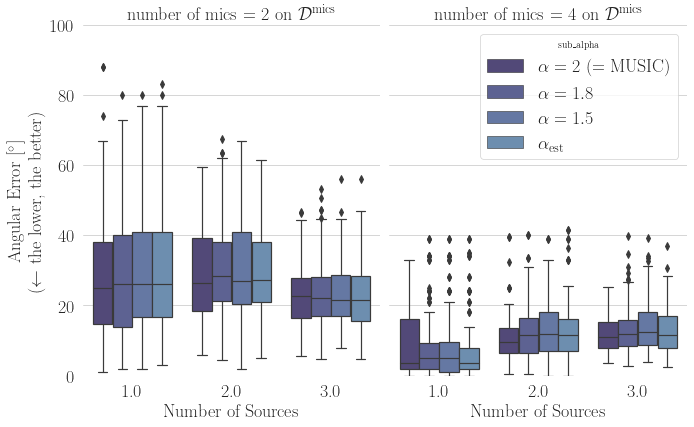

In [33]:
plt.figure(figsize=fig_size)

for i, I in enumerate([2,4]):
    plt.subplot(1,2,i+1)
    plt.title(f'number of mics = {I} on ' + r'$\mathcal{D}^\mathrm{mics}$')
    curr_df = df.loc[(df['n_mics'] == I) & (df['sub_algo'] == 'MUSIC') & (df['n_srcs'] < 4)]
    g = sns.boxplot(x='n_srcs', y='MAE', hue='sub_alpha',
                data=curr_df[['sub_alpha','n_mics','n_srcs','MAE']],
                hue_order= [
                    r'$\alpha=2$ (= MUSIC)',
                    r'$\alpha=1.8$',
                    r'$\alpha=1.5$',
                    r'$\alpha_{\mathrm{est}}$'
                ],
                palette=pal)
    plt.ylim([0,100])
    plt.ylabel('Angular Error [$^\circ$] \n $(\leftarrow$ the lower, the better)')
    plt.xlabel('Number of Sources')
    
    if i == 0:
        g.get_legend().set_visible(False)
    if i == 1:
        g.set_ylabel('')
        g.axes.yaxis.set_ticklabels([])

    
sns.despine(offset=10, trim=False, left=True, bottom=True)
plt.tight_layout(pad=0.5)
plt.savefig('../recipes/EUSIPCO22/figures/n_srcs_n_mics_alpha_mae_MUSIC.pdf', dpi=300)
plt.show()

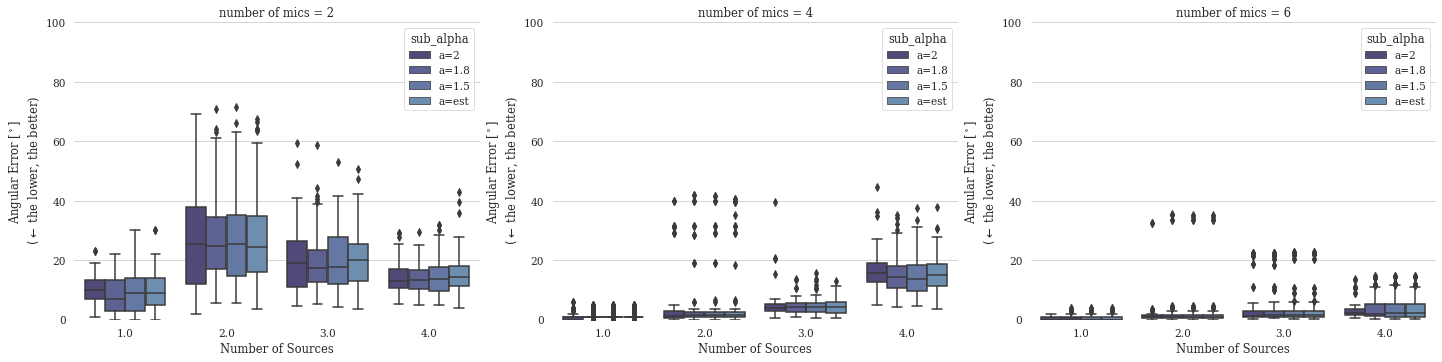

In [29]:
plt.figure(figsize=(20,5))

for i, I in enumerate([2,4,6]):
    plt.subplot(1,3,i+1)
    plt.title(f'number of mics = {I}')
    curr_df = df.loc[(df['n_mics'] == I) & (df['sub_algo'] == 'NormMUSIC')]
    sns.boxplot(x='n_srcs', y='MAE', hue='sub_alpha',
                hue_order=['a=2','a=1.8','a=1.5','a=est'],
                data=curr_df[['sub_alpha','n_mics','n_srcs','MAE']], 
                palette=pal)
    plt.ylim([0,100])
    plt.ylabel('Angular Error [$^\circ$] \n $(\leftarrow$ the lower, the better)')
    plt.xlabel('Number of Sources')

    
sns.despine(offset=10, trim=False, left=True, bottom=True)
plt.tight_layout(pad=0.5)
plt.savefig('../recipes/EUSIPCO22/figures/n_srcs_n_mics_alpha_mae_normMUSIC.pdf', dpi=300)
plt.show()

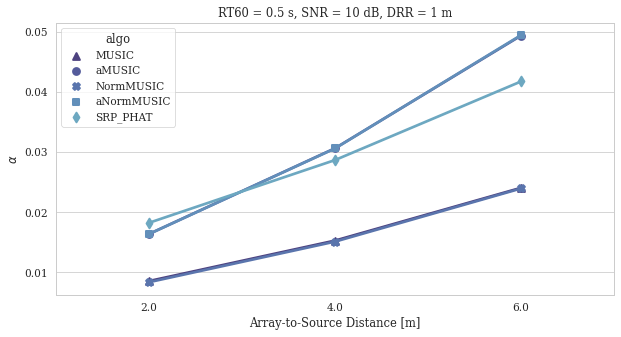

In [44]:
plt.figure(figsize=(10,5))
plt.title('RT60 = 0.5 s, SNR = 10 dB, DRR = 1 m')
sns.pointplot(x='n_mics', y='time', hue='algo',
            data=df.loc[(df['alpha'] != 1.5) & (df['alpha'] != 1.8) & (df['p'] != 1.5)],
            markers=['^','o','X','s','d','v','*'],
            palette=pal, ci=None)
plt.ylabel(r'$\alpha$')
plt.xlabel('Array-to-Source Distance [m]')
plt.savefig('../recipes/EUSIPCO22/figures/time.pdf',dpi=300)
plt.show()

In [51]:
print(df.loc[(df['alpha'] != 1.5) & (df['alpha'] != 1.8) & (df['p'] != 1.5)].groupby(['algo','n_mics']).mean('time')['time'])

algo        n_mics
MUSIC       2.0       0.008500
            4.0       0.015239
            6.0       0.024030
NormMUSIC   2.0       0.008315
            4.0       0.015074
            6.0       0.023926
SRP_PHAT    2.0       0.018207
            4.0       0.028660
            6.0       0.041753
aMUSIC      2.0       0.016348
            4.0       0.030627
            6.0       0.049395
aNormMUSIC  2.0       0.016335
            4.0       0.030596
            6.0       0.049478
Name: time, dtype: float64
